# Exercise 2

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
def RidgeReg(X, y, nlambda):
    n = X.shape[1]
    I = np.eye(n)
    beta_ridge = np.linalg.inv(X.T@X + nlambda*I)@X.T@y
    return beta_ridge

In [32]:
def RidgePred(X, beta):
    return X@beta


Degree: 5
OLS - MSE Train: 0.02338, MSE Test: 0.01985


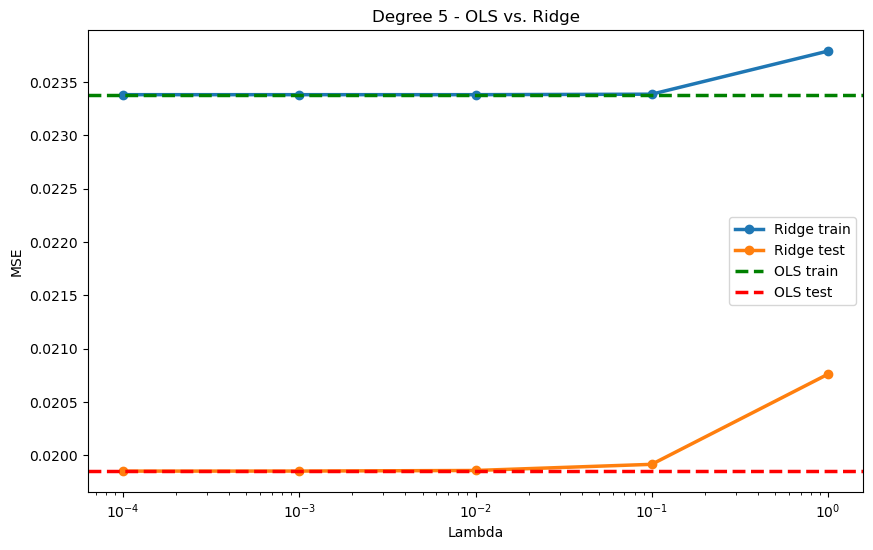


Degree: 10
OLS - MSE Train: 0.00766, MSE Test: 0.00889


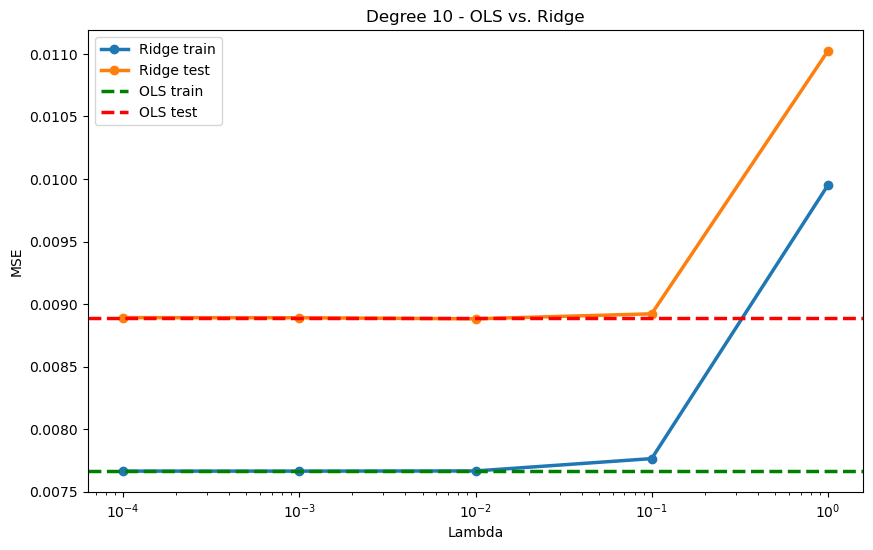


Degree: 15
OLS - MSE Train: 0.00723, MSE Test: 0.00964


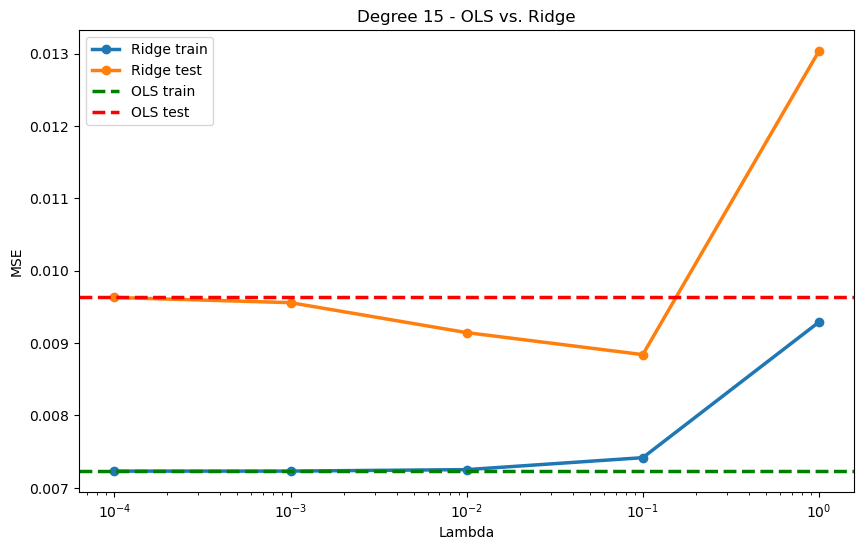

In [34]:
np.random.seed(777)
n = 100
x = np.linspace(-3,3,n).reshape(-1,1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0,0.1,x.shape)
lambdalist = [0.0001, 0.001, 0.01, 0.1, 1.0]
poldegree = [5,10,15]

for deg in poldegree:
    polynom = PolynomialFeatures(degree=deg)
    X = polynom.fit_transform(x)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
    
    beta_OLS = RidgeReg(X_train, y_train, nlambda=0)
    ypred_OLS_train = RidgePred(X_train, beta_OLS)
    ypred_OLS_test = RidgePred(X_test, beta_OLS)
    
    MSE_OLS_train = mean_squared_error(y_train, ypred_OLS_train)
    MSE_OLS_test = mean_squared_error(y_test, ypred_OLS_test)
    
    print(f"\nDegree: {deg}")
    print(f"OLS - MSE Train: {MSE_OLS_train:.5f}, MSE Test: {MSE_OLS_test:.5f}")
    
    MSE_Ridge_train = []
    MSE_Ridge_test = []
    
    for nlambda in lambdalist:
        beta_Ridge = RidgeReg(X_train, y_train, nlambda)
        ypred_Ridge_train = RidgePred(X_train, beta_Ridge)
        ypred_Ridge_test = RidgePred(X_test, beta_Ridge)
        
        MSE_Ridge_train.append(mean_squared_error(y_train, ypred_Ridge_train))
        MSE_Ridge_test.append(mean_squared_error(y_test, ypred_Ridge_test))
    
    plt.figure(figsize=(10, 6))
    plt.plot(lambdalist, MSE_Ridge_train, label="Ridge train", marker='o', lw=2.5)
    plt.plot(lambdalist, MSE_Ridge_test, label="Ridge test", marker='o', lw=2.5)
    plt.axhline(y=MSE_OLS_train, color='g', linestyle='--', label="OLS train", lw=2.5)
    plt.axhline(y=MSE_OLS_test, color='r', linestyle='--', label="OLS test", lw=2.5)
    plt.xscale('log')
    plt.xlabel('Lambda')
    plt.ylabel('MSE')
    plt.title(f"Degree {deg} - OLS vs. Ridge")
    plt.legend()
    plt.savefig(f'OLS-Ridge-degree-{deg}.pdf')
    plt.show()
        

When lambda is low, both OLS and Ridge are very similar regardless of the polynomial degree. For Ridge, the MSE train and test at degree = 5 and degree = 10 increases with the increase of lambda. This is because of underfitting. However, for degree = 15, MSE test decreases while MSE train increases when lambda increases. This is because of overfitting the data. However, at a large enough lambda, it reduces the overfitting and thus it goes back to underfitting the data as we see for degree = 5 and 10.